Nur Annisa Kusumawardani /
SDAB-41

# Configuring data

In [ ]:
import pandas as pd
import numpy as np
import os
from google.cloud import bigquery
from google.colab import drive

drive.mount('/content/drive')

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/drive/MyDrive/Dataset1/private-key.json"

Mounted at /content/drive


In [ ]:
bqclient = bigquery.Client()

query = """
    SELECT * FROM `bitlabs-dab.finalexam.status` AS status
    LEFT JOIN `bitlabs-dab.finalexam.main_data` AS main
    ON status.`complaint-ID` = main.complaint_ID
    LEFT JOIN `bitlabs-dab.finalexam.detail` AS detail
    ON main.type_complaint_code = detail.type_complaint_code
"""

data = pd.read_gbq(query,project_id = 'bitlabs-dab', dialect = 'standard')
data.head()

,complaint-ID,status,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,type_complaint_code_1,type_complaint
0,C000269,None,C000269,ASR,It's frustrating to know that there are resear...,19,0.31,1,1,M,ASR,Academic Support and Resources
1,C000014,None,C000014,ASR,The course fees and textbook costs are way too...,24,3.26,2,1,F,ASR,Academic Support and Resources
2,C000152,None,C000152,ASR,It's-really-frustrating-to-not-have-more-acces...,26,0.09,2,1,F,ASR,Academic Support and Resources
3,C000442,None,C000442,ASR,I've-been-working-a-lot-lately-and-it's-been-h...,17,0.93,1,1,F,ASR,Academic Support and Resources
4,C000485,None,C000485,ANS,I-suffered-a-sports-related-injury-and-had-to-...,19,3.9,3,1,F,ANS,Athletics and sports


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   complaint-ID           1009 non-null   object
 1   status                 991 non-null    object
 2   complaint_ID           1009 non-null   object
 3   type_complaint_code    1009 non-null   object
 4   reports                1009 non-null   object
 5   age                    981 non-null    object
 6   gpa                    1009 non-null   object
 7   year                   1009 non-null   object
 8   count                  1009 non-null   object
 9   gender                 1009 non-null   object
 10  type_complaint_code_1  1009 non-null   object
 11  type_complaint         1009 non-null   object
dtypes: object(12)
memory usage: 94.7+ KB


## Data Cleaning & Data Transformation

Changing datatype, rename & drop columns, handling missing values & duplicates

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   complaint-ID           1009 non-null   object
 1   status                 991 non-null    object
 2   complaint_ID           1009 non-null   object
 3   type_complaint_code    1009 non-null   object
 4   reports                1009 non-null   object
 5   age                    981 non-null    object
 6   gpa                    1009 non-null   object
 7   year                   1009 non-null   object
 8   count                  1009 non-null   object
 9   gender                 1009 non-null   object
 10  type_complaint_code_1  1009 non-null   object
 11  type_complaint         1009 non-null   object
dtypes: object(12)
memory usage: 94.7+ KB


Dropping unnecesaary columns (because some other columns are already exist)

In [ ]:
data = data.drop(['complaint-ID', 'type_complaint_code_1'], axis=1)
data.head()

,status,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,type_complaint
0,None,C000269,ASR,It's frustrating to know that there are resear...,19,0.31,1,1,M,Academic Support and Resources
1,None,C000014,ASR,The course fees and textbook costs are way too...,24,3.26,2,1,F,Academic Support and Resources
2,None,C000152,ASR,It's-really-frustrating-to-not-have-more-acces...,26,0.09,2,1,F,Academic Support and Resources
3,None,C000442,ASR,I've-been-working-a-lot-lately-and-it's-been-h...,17,0.93,1,1,F,Academic Support and Resources
4,None,C000485,ANS,I-suffered-a-sports-related-injury-and-had-to-...,19,3.9,3,1,F,Athletics and sports


Find and drop duplicate records

In [ ]:
duplicates = data.duplicated()
print("Number of duplicate records:", duplicates.sum())

Number of duplicate records: 4


In [ ]:
data = data.drop_duplicates()

In [ ]:
duplicates = data.duplicated()
print("Number of duplicate records:", duplicates.sum())

Number of duplicate records: 0


Handling missing values

In [ ]:
data.isnull().sum()

status                 18
complaint_ID            0
type_complaint_code     0
reports                 0
age                    28
gpa                     0
year                    0
count                   0
gender                  0
type_complaint          0
dtype: int64

Dropping null data on status because it is necessary to do so (without knowing the status, we can't handle the complaint and thus analyze them). Meanwhile, I do not drop the year because this can be filled by mean data.

In [ ]:
data = data.dropna(subset=['status'])
data.isnull().sum()

status                  0
complaint_ID            0
type_complaint_code     0
reports                 0
age                    26
gpa                     0
year                    0
count                   0
gender                  0
type_complaint          0
dtype: int64

Replace null value in column age by the mean value, assuming the data is fairly distributed

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 18 to 1008
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   status               987 non-null    object
 1   complaint_ID         987 non-null    object
 2   type_complaint_code  987 non-null    object
 3   reports              987 non-null    object
 4   age                  961 non-null    object
 5   gpa                  987 non-null    object
 6   year                 987 non-null    object
 7   count                987 non-null    object
 8   gender               987 non-null    object
 9   type_complaint       987 non-null    object
dtypes: object(10)
memory usage: 84.8+ KB


Changing data type of column "GPA" and "age" to numeric so we can analyze the data using statistics tools

In [ ]:
data['gpa'] = pd.to_numeric(data['gpa'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 18 to 1008
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   status               987 non-null    object 
 1   complaint_ID         987 non-null    object 
 2   type_complaint_code  987 non-null    object 
 3   reports              987 non-null    object 
 4   age                  961 non-null    object 
 5   gpa                  987 non-null    float64
 6   year                 987 non-null    object 
 7   count                987 non-null    object 
 8   gender               987 non-null    object 
 9   type_complaint       987 non-null    object 
dtypes: float64(1), object(9)
memory usage: 84.8+ KB


In [ ]:
data['age'] = pd.to_numeric(data['age'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 18 to 1008
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   status               987 non-null    object 
 1   complaint_ID         987 non-null    object 
 2   type_complaint_code  987 non-null    object 
 3   reports              987 non-null    object 
 4   age                  961 non-null    float64
 5   gpa                  987 non-null    float64
 6   year                 987 non-null    object 
 7   count                987 non-null    object 
 8   gender               987 non-null    object 
 9   type_complaint       987 non-null    object 
dtypes: float64(2), object(8)
memory usage: 84.8+ KB


In [ ]:
data.describe()

,age,gpa
count,961.000000,987.000000
mean,21.293444,2.094073
std,3.330611,1.208466
min,16.000000,0.010000
25%,18.000000,1.085000
50%,21.000000,2.120000
75%,24.000000,3.090000
max,27.000000,4.970000


In [ ]:
data['age'].fillna(21, inplace=True)

In [ ]:
data.isnull().sum()

status                 0
complaint_ID           0
type_complaint_code    0
reports                0
age                    0
gpa                    0
year                   0
count                  0
gender                 0
type_complaint         0
dtype: int64

## Data Transformation

Changing data type

changing "age" column to integer

In [ ]:
data['age'] = data['age'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 18 to 1008
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   status               987 non-null    object 
 1   complaint_ID         987 non-null    object 
 2   type_complaint_code  987 non-null    object 
 3   reports              987 non-null    object 
 4   age                  987 non-null    int64  
 5   gpa                  987 non-null    float64
 6   year                 987 non-null    object 
 7   count                987 non-null    object 
 8   gender               987 non-null    object 
 9   type_complaint       987 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 84.8+ KB


In [ ]:
data['year'] = data['year'].astype(int)

## Handling Outliers

In [ ]:
# Display outlier
# Calculate the IQR
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers using the lower and upper bounds
outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]

# Display the outliers
outliers

,status,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,type_complaint


In [ ]:
file_path = 'data.csv'

df.to_csv(file_path, index=False)

from google.colab import files

# Download the CSV file
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

no outliers data detected

## Exploratory Data Analysis

In [ ]:
data.head()

,status,complaint_ID,type_complaint_code,reports,age,gpa,year,count,gender,type_complaint
18,OPEN,C000008,ASR,-I-am-really-struggling-with-understanding-the...,26,2.50,2,1,F,Academic Support and Resources
19,OPEN,C000139,ASR,The limited access to research databases and m...,19,0.30,2,1,M,Academic Support and Resources
20,OPEN,C000216,ASR,Limited access to academic advisors is causing...,17,1.60,1,1,M,Academic Support and Resources
21,OPEN,C000380,ASR,I have been finding it difficult to balance my...,21,2.85,1,1,M,Academic Support and Resources
22,OPEN,C000502,ANS,The athletic eligibility requirements are too ...,25,2.13,1,1,F,Athletics and sports


In [ ]:
# Display the summary statistics
print('Summary Statistics:', df.describe())

Summary Statistics: count     11.000000
mean      89.727273
std       53.647164
min       33.000000
25%       58.500000
50%       86.000000
75%       90.500000
max      226.000000
Name: complaint_ID, dtype: float64


seeing the frequent type complaint code and its progress

In [ ]:
df = data.groupby('status')['complaint_ID'].count().sort_values(ascending=False)
df

status
CLOSE      453
PROCESS    337
OPEN       197
Name: complaint_ID, dtype: int64

More than 50% complaints are already closed, but the rest are still in process and open

In [ ]:
df = data.groupby('type_complaint_code')['complaint_ID'].count().sort_values(ascending=False)
df

type_complaint_code
ASR    226
FNC    138
FNS     91
ONL     90
CRO     89
ISE     86
ANS     77
HNT     64
HWS     53
ANT     40
STA     33
Name: complaint_ID, dtype: int64

Academic and Finance made up by 30% of complaints, this is what we will tackle first (and later be anaylzed more thoroughly)

In [ ]:
df = data.groupby('year')['complaint_ID'].count()
df

year
1    291
2    221
3    140
4    173
5    162
Name: complaint_ID, dtype: int64

Most complaints are coming from fresman-sophomore year students, meaning the students find several services that need to be improved

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

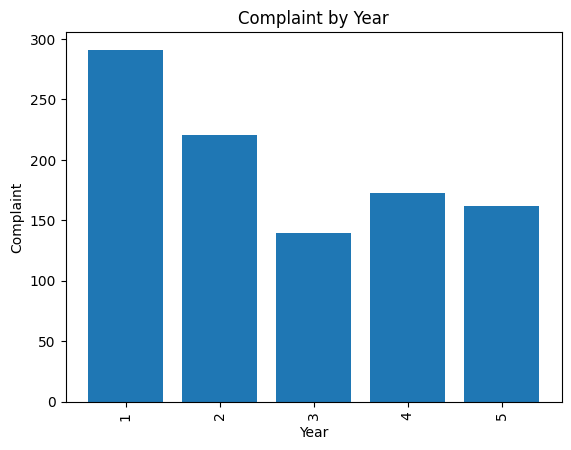

In [ ]:
df = data.groupby('year')['complaint_ID'].count()
plt.bar(df.index, df)
plt.xlabel('Year')
plt.ylabel('Complaint')
plt.title('Complaint by Year')
plt.xticks(rotation=90)
plt.show()

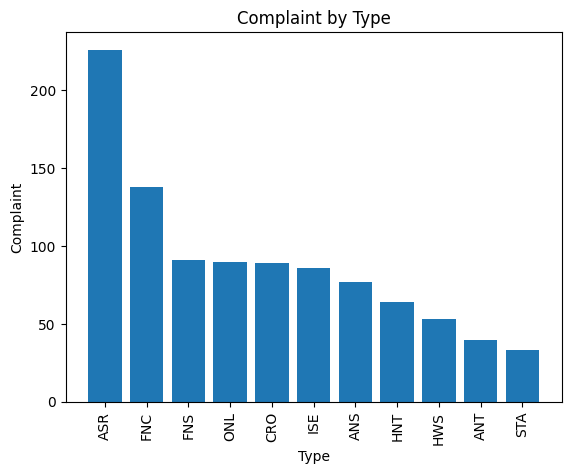

In [ ]:
df = data.groupby('type_complaint_code')['complaint_ID'].count().sort_values(ascending=False)
plt.bar(df.index, df)
plt.xlabel('Type')
plt.ylabel('Complaint')
plt.title('Complaint by Type')
plt.xticks(rotation=90)
plt.show()

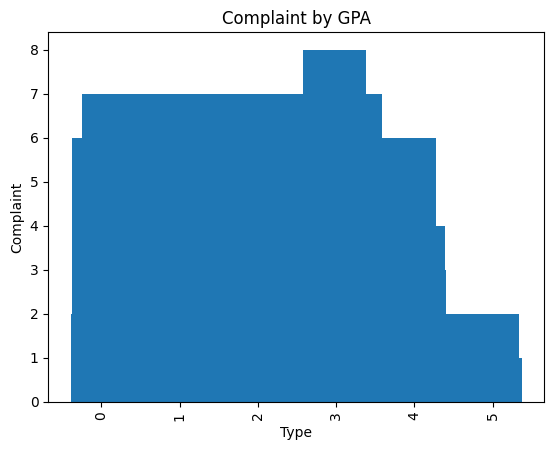

In [ ]:
df = data.groupby('gpa')['complaint_ID'].count().sort_values(ascending=False)
plt.bar(df.index, df)
plt.xlabel('Type')
plt.ylabel('Complaint')
plt.title('Complaint by GPA')
plt.xticks(rotation=90)
plt.show()

Distribution of ratings

In [ ]:
fig = px.histogram(data['type_complaint_code'],
                   labels={'value': 'Type',
                           'count': 'Frequency',
                           'color': 'Type'}, color=data['type_complaint_code'])
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the complaints',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

459 complaints are coming from ASR and FNC

In [ ]:
fig = px.histogram(data['status'],
                   labels={'value': 'Status',
                           'count': 'Frequency',
                           'color': 'Status'}, color=data['status'])
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the complaints',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

In [ ]:
fig = px.histogram(data['type_complaint_code'],
                   labels={'value': 'complaint code',
                           'count': 'Frequency',
                           'color': 'Status'}, color=data['status'])
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of Complaints and its status',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

In [ ]:
df = data.groupby('type_complaint_code').agg({'complaint_ID': 'count', 'age': 'mean', 'year': 'mean'}).sort_values(by='complaint_ID', ascending=False)
df

,complaint_ID,age,year
type_complaint_code,,,
ASR,226,21.371681,1.296460
FNC,138,20.413043,2.927536
FNS,91,21.637363,2.945055
ONL,90,21.744444,2.900000
CRO,89,20.865169,4.426966
ISE,86,21.302326,2.825581
ANS,77,21.415584,2.857143
HNT,64,21.859375,2.890625
HWS,53,21.716981,2.924528


In [ ]:
fig = px.histogram(data['year'], color=data['type_complaint_code'],
                   labels={'value': 'Year',
                           'color': 'Type'})
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Relationship between Year and Type of Complaint',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='group')
fig.show()

In [ ]:
fig = px.histogram(data['type_complaint_code'], color=data['status'],
                   labels={'value': 'Type of Complaint',
                           'color': 'Status'})
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Relationship between Type of Complaint and Status',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='group')
fig.show()

Looking at the status, we can see that ASR and FNC are still processing, meaning the campus is relatively slow in solving the problems

From the data, we can get that the complaints are mostly coming from 1st and 2nd year student, in which most of them are complaining about academic and financial services in campus. It means that they are struggling to grasp all the administration flow

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 18 to 1008
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   status               987 non-null    object 
 1   complaint_ID         987 non-null    object 
 2   type_complaint_code  987 non-null    object 
 3   reports              987 non-null    object 
 4   age                  987 non-null    int64  
 5   gpa                  987 non-null    float64
 6   year                 987 non-null    int64  
 7   count                987 non-null    object 
 8   gender               987 non-null    object 
 9   type_complaint       987 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 84.8+ KB


In [ ]:
data['reports'] = data['reports'].str.lower()
data['reports'].head()

18    -i-am-really-struggling-with-understanding-the...
19    the limited access to research databases and m...
20    limited access to academic advisors is causing...
21    i have been finding it difficult to balance my...
22    the athletic eligibility requirements are too ...
Name: reports, dtype: object

Eventhough it is not as advance as NLP, seeing frequent words can help in deducting the roots problems, especially if we already know that most of the complaints are coming from 1st and 2nd year students with the type of ASR and FNC. By this knowledge, we can connect the frequent words with the root problems

In [ ]:
freq_df = data['reports'].str.split(expand=True).stack().value_counts()
freq_df = freq_df[:200]

fig = px.treemap(freq_df, path=[freq_df.index], values=0)
fig.update_layout(title_text='Top Frequent 200 Words in the Dataset',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

some key words: **limited, sources, hard, afford, access, opportunities, classes,resources, academic.** They feel struggling and find it frustating to adapt in campus especially with the current services.

# Saving files to CSV for data viz

In [ ]:
freq_df = data['reports'].str.split(expand=True).stack().value_counts()

file_path = 'data.csv'

freq_df.to_csv(file_path, index=False)

from google.colab import files

# Download the CSV file
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>